# **CSC 4008 Assignment 4 (Q1) - 119020062 许文仲**

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
openjdk-8-jdk-headless is already the newest version (8u362-ga-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/drive/My Drive')

Mounted at /content/gdrive


In [ ]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from pyspark.sql import SparkSession
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext

In [ ]:
# spark = SparkSession.builder.getOrCreate()
sc = pyspark.SparkContext.getOrCreate()
path_c1 = "/content/gdrive/MyDrive/Colab Notebooks/CSC 4008/c1.txt"
path_c2 = "/content/gdrive/MyDrive/Colab Notebooks/CSC 4008/c2.txt"
path_X = "/content/gdrive/MyDrive/Colab Notebooks/CSC 4008/data.txt"

data_X = sc.textFile(path_X)
centroid1 = sc.textFile(path_c1)
centroid2 = sc.textFile(path_c2)
# rdd.collect()

In [ ]:
# get the first level friend RDD
rdd_X = data_X.map(lambda x: x.split(" "))
rdd_c1 = centroid1.map(lambda x: x.split(" "))
rdd_c2 = centroid2.map(lambda x: x.split(" "))

In [ ]:
c1 = np.array(rdd_c1.collect())
c1_list = []
for i in c1:
  c1_list.append(np.array(list(map(float, i))))

In [ ]:
# Using Euclidean distance
c1 = np.array(rdd_c1.collect())
c1_list = []
for i in c1:
  c1_list.append(np.array(list(map(float, i))))

def findc1(line):
  # 找到每个点属于哪一类
  line = list(line)
  p = list(map(float, line))
  p = np.array(p)
  Eu_list = []
  # result = np.sqrt(np.sum(np.square(np.array(centroid) - p)))
  for centroid in c1_list:
    Eu_dis = np.sqrt(np.sum(np.square(centroid - p)))
    Eu_list.append(Eu_dis)
  result = np.argmin(np.array(Eu_list))
  return (result, p)

def find_obj(line):
  clas = line[0]
  point = line[1]
  square_Eu = np.sum(np.square(c1_list[clas] - point))
  return square_Eu


def update_c1(line):
  # 更新 C1
  points = np.array(line[1])
  result = np.average(points, axis=0)
  return (line[0], result)

def find_c1(rdd_c1):
  # 将新 C1 做成我们想要的格式
  collect_c1 = rdd_c1.collect()
  collect_c1 = sorted(collect_c1)
  c1_list = []
  for i in collect_c1:
    c1_list.append(i[1])
  return c1_list



k = 10
max_iter = 20
phi1_list = []
while max_iter > 0:
  print(max_iter)

  temp = rdd_X.map(findc1)

  obj = temp.map(find_obj)
  phi = obj.sum()
  phi1_list.append(phi)
  print(phi)

  iteration = temp.groupByKey().map(lambda x : (x[0], list(x[1])))

  new_c1 = iteration.map(update_c1)
  c1_list = find_c1(new_c1)
  max_iter -= 1

# test = rdd_X.map(findc1)
# ite1 = test.groupByKey().map(lambda x : (x[0], list(x[1])))


20
623660345.3064115
19
509862908.2975454
18
485480681.8720084
17
463997011.68501294
16
460969266.5729968
15
460537847.9827684
14
460313099.6535447
13
460003523.8894081
12
459570539.3177352
11
459021103.3422909
10
458490656.1919812
9
457944232.5879751
8
457558005.1986773
7
457290136.35230196
6
457050555.05956286
5
456892235.61535585
4
456703630.7370345
3
456404203.01897514
2
456177800.541994
1
455986871.0273468


In [ ]:
c2 = np.array(rdd_c2.collect())
c2_list = []
for i in c2:
  c2_list.append(np.array(list(map(float, i))))

def findc2(line):
  # 找到每个点属于哪一类
  line = list(line)
  p = list(map(float, line))
  p = np.array(p)
  Eu_list = []
  # result = np.sqrt(np.sum(np.square(np.array(centroid) - p)))
  for centroid in c2_list:
    Eu_dis = np.sqrt(np.sum(np.square(centroid - p)))
    Eu_list.append(Eu_dis)
  result = np.argmin(np.array(Eu_list))
  return (result, p)

def find_obj(line):
  clas = line[0]
  point = line[1]
  square_Eu = np.sum(np.square(c2_list[clas] - point))
  return square_Eu


def update_c2(line):
  # 更新 C2
  points = np.array(line[1])
  result = np.average(points, axis=0)
  return (line[0], result)

def find_c2(rdd_c2):
  # 将新 C2 做成我们想要的格式
  collect_c2 = rdd_c2.collect()
  collect_c2 = sorted(collect_c2)
  c2_list = []
  for i in collect_c2:
    c2_list.append(i[1])
  return c2_list



k = 10
max_iter = 20
phi2_list = []
while max_iter > 0:
  print(max_iter)

  temp = rdd_X.map(findc2)

  obj = temp.map(find_obj)
  phi = obj.sum()
  phi2_list.append(phi)
  print(phi)

  iteration = temp.groupByKey().map(lambda x : (x[0], list(x[1])))

  new_c2 = iteration.map(update_c2)
  c2_list = find_c2(new_c2)
  max_iter -= 1

# test = rdd_X.map(findc2)
# ite1 = test.groupByKey().map(lambda x : (x[0], list(x[1])))


20
438747790.02791756
19
249803933.62600276
18
194494814.40631256
17
169804841.4515432
16
156295748.8062759
15
149094208.10896596
14
142508531.61961532
13
132303869.40652987
12
117170969.83719075
11
108547377.17857003
10
102237203.3179959
9
98278015.74975666
8
95630226.12177408
7
93793314.051193
6
92377131.96821065
5
91541606.25423889
4
91045573.83042458
3
90752240.10140811
2
90470170.18122731
1
90216416.1756313


In [ ]:
# Using Manhattan distance
c1 = np.array(rdd_c1.collect())
c1_list = []
for i in c1:
  c1_list.append(np.array(list(map(float, i))))

def findc1(line):
  # 找到每个点属于哪一类
  line = list(line)
  p = list(map(float, line))
  p = np.array(p)
  Eu_list = []
  # result = np.sqrt(np.sum(np.square(np.array(centroid) - p)))
  for centroid in c1_list:
    Eu_dis = np.sum(np.abs(centroid - p))
    Eu_list.append(Eu_dis)
  result = np.argmin(np.array(Eu_list))
  return (result, p)

def find_obj(line):
  clas = line[0]
  point = line[1]
  square_Eu = np.sum(np.abs(c1_list[clas] - point))
  return square_Eu


def update_c1(line):
  # 更新 C1
  points = np.array(line[1])
  result = np.average(points, axis=0)
  return (line[0], result)

def find_c1(rdd_c1):
  # 将新 C1 做成我们想要的格式
  collect_c1 = rdd_c1.collect()
  collect_c1 = sorted(collect_c1)
  c1_list = []
  for i in collect_c1:
    c1_list.append(i[1])
  return c1_list



k = 10
max_iter = 20
Mphi1_list = []
while max_iter > 0:
  print(max_iter)

  temp = rdd_X.map(findc1)

  obj = temp.map(find_obj)
  phi = obj.sum()
  Mphi1_list.append(phi)
  print(phi)

  iteration = temp.groupByKey().map(lambda x : (x[0], list(x[1])))

  new_c1 = iteration.map(update_c1)
  c1_list = find_c1(new_c1)
  max_iter -= 1

# test = rdd_X.map(findc1)
# ite1 = test.groupByKey().map(lambda x : (x[0], list(x[1])))


20
550117.1419999995
19
464829.2684039448
18
470934.15384668094
17
483874.81628509343
16
489234.23478834634
15
487664.6926267904
14
483718.6659285149
13
475337.9476330566
12
474871.9665496566
11
457244.7897417528
10
447493.1956040521
9
450891.8358047706
8
451232.57747569657
7
451860.12588546576
6
451567.2235891488
5
452710.0520999437
4
453078.22696184996
3
450646.13556209404
2
450419.9701134367
1
449009.5903718855


In [ ]:
c2 = np.array(rdd_c2.collect())
c2_list = []
for i in c2:
  c2_list.append(np.array(list(map(float, i))))

def findc2(line):
  # 找到每个点属于哪一类
  line = list(line)
  p = list(map(float, line))
  p = np.array(p)
  Eu_list = []
  # result = np.sqrt(np.sum(np.square(np.array(centroid) - p)))
  for centroid in c2_list:
    Eu_dis = np.sum(np.abs(centroid - p))
    Eu_list.append(Eu_dis)
  result = np.argmin(np.array(Eu_list))
  return (result, p)

def find_obj(line):
  clas = line[0]
  point = line[1]
  square_Eu = np.sum(np.abs(c2_list[clas] - point))
  return square_Eu


def update_c2(line):
  # 更新 C2
  points = np.array(line[1])
  result = np.average(points, axis=0)
  return (line[0], result)

def find_c2(rdd_c2):
  # 将新 C2 做成我们想要的格式
  collect_c2 = rdd_c2.collect()
  collect_c2 = sorted(collect_c2)
  c2_list = []
  for i in collect_c2:
    c2_list.append(i[1])
  return c2_list



k = 10
max_iter = 20
Mphi2_list = []
while max_iter > 0:
  print(max_iter)

  temp = rdd_X.map(findc2)

  obj = temp.map(find_obj)
  phi = obj.sum()
  Mphi2_list.append(phi)
  print(phi)

  iteration = temp.groupByKey().map(lambda x : (x[0], list(x[1])))

  new_c2 = iteration.map(update_c2)
  c2_list = find_c2(new_c2)
  max_iter -= 1

# test = rdd_X.map(findc2)
# ite1 = test.groupByKey().map(lambda x : (x[0], list(x[1])))


20
1433739.3099999954
19
1084488.7769648773
18
973431.7146620404
17
895934.592563071
16
865128.3352940815
15
845846.647031348
14
827219.5827561249
13
803590.3456011118
12
756039.5172761207
11
717332.9025432297
10
694587.9252526882
9
684444.5019967904
8
674574.7475478561
7
667409.469916028
6
663556.6278215044
5
660162.7772287563
4
656041.3222947121
3
653036.7540731612
2
651112.4262522729
1
649689.0131843555


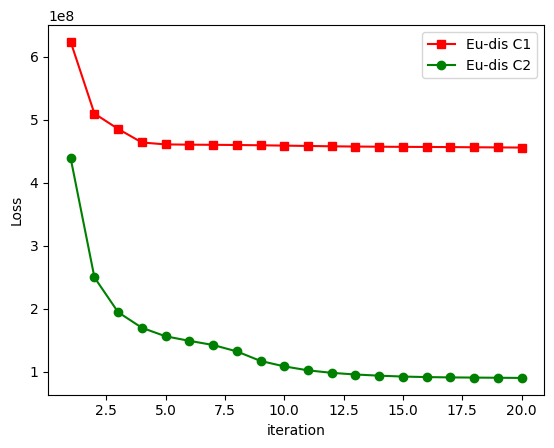

In [ ]:
import matplotlib.pyplot as plt

#折线图
x = [i for i in range(1,21)]#点的横坐标
k1 = phi1_list #线1的纵坐标
k2 = phi2_list #线2的纵坐标
plt.plot(x,k1,'s-',color = 'r',label="Eu-dis C1")#
plt.plot(x,k2,'o-',color = 'g',label="Eu-dis C2")#
plt.xlabel("iteration")#横坐标名字
plt.ylabel("Loss")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()



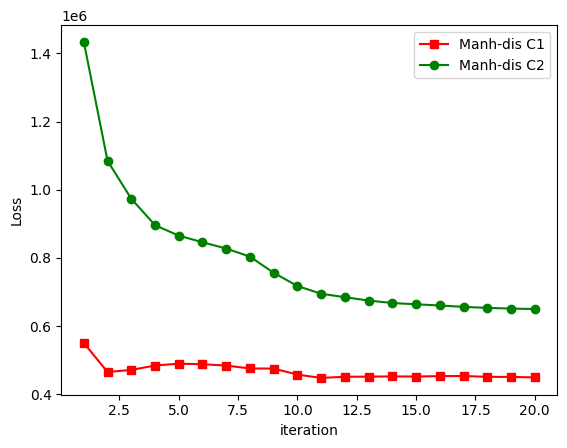

In [ ]:
import matplotlib.pyplot as plt

#折线图
x = [i for i in range(1,21)]#点的横坐标
k1 = Mphi1_list #线1的纵坐标
k2 = Mphi2_list #线2的纵坐标
plt.plot(x,k1,'s-',color = 'r',label="Manh-dis C1")#
plt.plot(x,k2,'o-',color = 'g',label="Manh-dis C2")#
plt.xlabel("iteration")#横坐标名字
plt.ylabel("Loss")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

In [ ]:
def find_loss(l):
  result = (l[0] - l[10]) / l[0]
  print(result)

find_loss(phi1_list)
find_loss(phi2_list)
find_loss(Mphi1_list)
find_loss(Mphi2_list)


0.2648391714456056
0.7669795594605946
0.1865492611679923
0.515540991023891
